### Baseline
library & data 불러오기
  
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/code?datasetId=268833&sortBy=voteCount

In [1]:
import pandas as pd
import os

In [2]:
path = os.getenv("HOME") + "/data/"

tr = pd.read_csv( path +'train.csv')
te = pd.read_csv( path +'test.csv')
y_te = pd.read_csv( path + 'y_test.csv')

### EDA
exploration data analysis 데이터 내부 살펴보기

In [3]:
tr.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Petter,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Eric,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,George,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,NaN,1,0


In [4]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

### Pandas에서 시각화 하는 종류가 이렇게 있나봐요!  
The kind of plot to produce:

‘line’ : line plot (default)

‘bar’ : vertical bar plot  
‘barh’ : horizontal bar plot  
‘hist’ : histogram  

‘box’ : boxplot  
‘kde’ : Kernel Density Estimation plot  
‘density’ : same as ‘kde’  

‘area’ : area plot  
‘pie’ : pie plot  
‘scatter’ : scatter plot (DataFrame only)  

‘hexbin’ : hexbin plot (DataFrame only

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot

<AxesSubplot:>

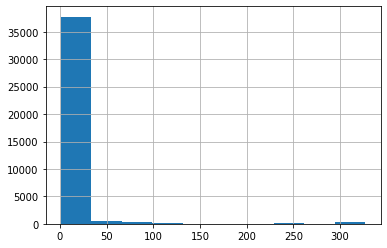

In [5]:
tr['calculated_host_listings_count'].hist(bins = 10)

In [6]:
tr['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [7]:
tr['availability_365'].describe()

count    39116.000000
mean       112.980826
std        131.674306
min          0.000000
25%          0.000000
50%         45.000000
75%        228.000000
max        365.000000
Name: availability_365, dtype: float64

In [8]:
avail = tr.groupby("room_type")["availability_365"].mean()
avail

room_type
Entire home/apt    111.852899
Private room       111.645111
Shared room        162.686504
Name: availability_365, dtype: float64

<AxesSubplot:xlabel='room_type'>

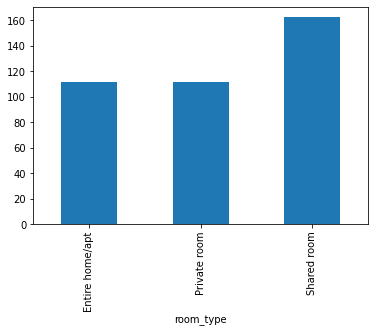

In [9]:
avail.plot.bar()

In [10]:
room = tr.groupby("room_type")["price"].mean()
room

room_type
Entire home/apt    211.438642
Private room        90.519188
Shared room         68.969182
Name: price, dtype: float64

<AxesSubplot:xlabel='room_type'>

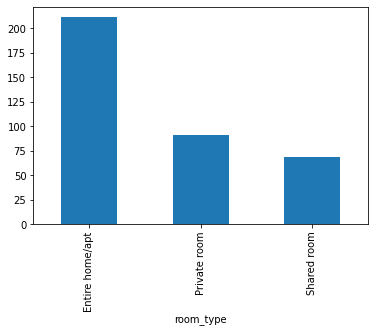

In [11]:
room.plot.bar()

In [12]:
tr.shape, te.shape, y_te.shape

((39116, 16), (9779, 15), (9779, 1))

In [13]:
te.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244
2,414801,Industrial Brooklyn Loft with Tree-Lined Windows,319077,Shell,Brooklyn,Clinton Hill,40.68722,-73.96289,Entire home/apt,1,54,2019-03-24,0.65,4,365
3,21815842,Spacious 2 bedroom in beautiful Clinton Hill,1931990,Yarden,Brooklyn,Clinton Hill,40.68859,-73.96035,Entire home/apt,3,2,2018-05-11,0.13,1,0
4,13576581,Modern Central Park Apartment close to everything,78325795,Bozhena,Manhattan,Harlem,40.80573,-73.94994,Entire home/apt,1,160,2019-06-23,4.31,3,246


In [14]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9775 non-null   object 
 2   host_id                         9779 non-null   int64  
 3   host_name                       9775 non-null   object 
 4   neighbourhood_group             9779 non-null   object 
 5   neighbourhood                   9779 non-null   object 
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   object 
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  last_review                     7721 non-null   object 
 12  reviews_per_month               77

In [15]:
y_te.head()

,price
0,80
1,190
2,500
3,93
4,129


In [16]:
y_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   price   9779 non-null   int64
dtypes: int64(1)
memory usage: 76.5 KB


In [17]:
tr.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [18]:
te.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [19]:
y_te.isnull().sum()

price    0
dtype: int64

### Preprocessing data
결측치(missing data) 및 이상치(차이가 큰 data) 처리

In [20]:
import numpy as np

In [21]:
tr['reviews_per_month'] = tr['reviews_per_month'].fillna(0)
te[['reviews_per_month']] = te[['reviews_per_month']].fillna(0)

In [22]:
tr.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [23]:
tr = tr.drop("host_name", axis = 1)
tr

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262
2,26871281,West Village Apartment,440022,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,2019-02-07,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2019-06-26,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,NaN,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Manhattan,Financial District,40.71035,-74.00734,Entire home/apt,185,30,0,NaN,0.00,2,346
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Queens,Springfield Gardens,40.66102,-73.77035,Private room,50,1,57,2019-06-21,7.28,3,342
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Manhattan,Upper East Side,40.77693,-73.94524,Entire home/apt,120,7,0,NaN,0.00,1,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Manhattan,Greenwich Village,40.73110,-73.99913,Entire home/apt,165,30,19,2018-10-15,0.23,1,259


In [24]:
tr['name'].value_counts()

Home away from home                                   15
Hillside Hotel                                        15
New york Multi-unit building                          13
Brooklyn Apartment                                     9
Private Room                                           8
                                                      ..
Luxury One Bedroom UWS                                 1
Your Home by the Park                                  1
Spacious Studio- Midtown Manhattan!                    1
A Perfect Midtown Studio (24/hr Doorman)               1
Funky 3 Bedroom Duplex in hip Greenpoint, Brooklyn     1
Name: name, Length: 38420, dtype: int64

In [25]:
tr["name"] = tr["name"].fillna("nan")
tr['name']

0                   Room in South Harlem near Central Park
1           Large 1BR Apartment, near Times Sq (2nd Floor)
2                                   West Village Apartment
3                      LARGE PRIVATE FLOOR IN BROOKLYN, NY
4             Sun-drenched apartment, 20 mins to Manhattan
                               ...                        
39111                     Stylish studio by Fulton station
39112                      Comfortable- JFK,LGA Best Value
39113      Sunny, Accessible, UES Apt - Summer in the City
39114                          1 BR Village - 30 day+ stay
39115    Funky 3 Bedroom Duplex in hip Greenpoint, Broo...
Name: name, Length: 39116, dtype: object

In [26]:
tr['name'].value_counts()

Home away from home                                   15
Hillside Hotel                                        15
New york Multi-unit building                          13
nan                                                   12
Brooklyn Apartment                                     9
                                                      ..
Luxury One Bedroom UWS                                 1
Your Home by the Park                                  1
Spacious Studio- Midtown Manhattan!                    1
A Perfect Midtown Studio (24/hr Doorman)               1
Funky 3 Bedroom Duplex in hip Greenpoint, Brooklyn     1
Name: name, Length: 38421, dtype: int64

In [27]:
tr.isnull().sum()

id                                   0
name                                 0
host_id                              0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [28]:
tr = tr.drop("last_review", axis = 1)
tr

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,150,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,85,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,44,28,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Manhattan,Financial District,40.71035,-74.00734,Entire home/apt,185,30,0,0.00,2,346
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Queens,Springfield Gardens,40.66102,-73.77035,Private room,50,1,57,7.28,3,342
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Manhattan,Upper East Side,40.77693,-73.94524,Entire home/apt,120,7,0,0.00,1,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Manhattan,Greenwich Village,40.73110,-73.99913,Entire home/apt,165,30,19,0.23,1,259


In [29]:
tr.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [30]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39116 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   neighbourhood_group             39116 non-null  object 
 4   neighbourhood                   39116 non-null  object 
 5   latitude                        39116 non-null  float64
 6   longitude                       39116 non-null  float64
 7   room_type                       39116 non-null  object 
 8   price                           39116 non-null  int64  
 9   minimum_nights                  39116 non-null  int64  
 10  number_of_reviews               39116 non-null  int64  
 11  reviews_per_month               39116 non-null  float64
 12  calculated_host_listings_count  

### target -> 예측할 값

In [31]:
tr["price"]

0         70
1        240
2        150
3         85
4         44
        ... 
39111    185
39112     50
39113    120
39114    165
39115    200
Name: price, Length: 39116, dtype: int64

In [32]:
target = tr["price"]
tr = tr.drop("price", axis = 1)
tr

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Manhattan,Harlem,40.80167,-73.95781,Private room,3,3,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,2,64,1.68,2,262
2,26871281,West Village Apartment,440022,Manhattan,West Village,40.73001,-74.00562,Entire home/apt,60,1,0.20,1,0
3,698132,"LARGE PRIVATE FLOOR IN BROOKLYN, NY",3577509,Brooklyn,Bedford-Stuyvesant,40.69128,-73.93653,Entire home/apt,4,239,2.89,2,1
4,15783953,"Sun-drenched apartment, 20 mins to Manhattan",12475280,Brooklyn,Bedford-Stuyvesant,40.68899,-73.95555,Private room,28,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,35425034,Stylish studio by Fulton station,107724585,Manhattan,Financial District,40.71035,-74.00734,Entire home/apt,30,0,0.00,2,346
39112,29754544,"Comfortable- JFK,LGA Best Value",223846870,Queens,Springfield Gardens,40.66102,-73.77035,Private room,1,57,7.28,3,342
39113,13261616,"Sunny, Accessible, UES Apt - Summer in the City",24693048,Manhattan,Upper East Side,40.77693,-73.94524,Entire home/apt,7,0,0.00,1,0
39114,531258,1 BR Village - 30 day+ stay,2609535,Manhattan,Greenwich Village,40.73110,-73.99913,Entire home/apt,30,19,0.23,1,259


cols = [
    "name",
    "neighbourhood_group",
    "neighbourhood",
    "room_type"
]

In [33]:
cols = tr.select_dtypes(include = "object").columns

te라는 data의 결측치 제거 안한듯 싶어서 확인해보니 name열에 있기에 제거

In [34]:
te = te.fillna("nan")

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform  
sklearn.preprocessing.LabelEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
for col in cols:
    tr[col] = le.fit_transform(tr[col])
    te[col] = le.fit_transform(te[col])

In [37]:
tr.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,29228,94219511,2,94,40.80167,-73.95781,1,3,3,0.09,2,0
1,9458704,19434,49015331,2,95,40.76037,-73.99016,0,2,64,1.68,2,262
2,26871281,36855,440022,2,209,40.73001,-74.00562,0,60,1,0.20,1,0
3,698132,19041,3577509,1,13,40.69128,-73.93653,0,4,239,2.89,2,1
4,15783953,33319,12475280,1,13,40.68899,-73.95555,1,28,0,0.00,1,0


In [38]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39116 non-null  int64  
 2   host_id                         39116 non-null  int64  
 3   neighbourhood_group             39116 non-null  int64  
 4   neighbourhood                   39116 non-null  int64  
 5   latitude                        39116 non-null  float64
 6   longitude                       39116 non-null  float64
 7   room_type                       39116 non-null  int64  
 8   minimum_nights                  39116 non-null  int64  
 9   number_of_reviews               39116 non-null  int64  
 10  reviews_per_month               39116 non-null  float64
 11  calculated_host_listings_count  39116 non-null  int64  
 12  availability_365                

In [39]:
te.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,3178,33771081,Rémy,1,187,40.70959,-73.94652,1,3,2,2019-05-08,0.31,1,0
1,971247,8473,5308961,Larry,2,177,40.79368,-73.96487,0,3,159,2019-07-03,2.09,1,244
2,414801,4697,319077,Shell,1,35,40.68722,-73.96289,0,1,54,2019-03-24,0.65,4,365
3,21815842,7765,1931990,Yarden,1,35,40.68859,-73.96035,0,3,2,2018-05-11,0.13,1,0
4,13576581,5755,78325795,Bozhena,2,83,40.80573,-73.94994,0,1,160,2019-06-23,4.31,3,246


### 검증 데이터 분리
수치형(n) 및 범주형(c) 데이터로 분리 df의 unique 확인   
Train 데이터로 학습(훈련)  ->  X_train, y_train  
Validation(검증용) 데이터로 예측  ->  X_val,  y_val  

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split  
sklearn.model_selection.train_test_split  
(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_val, y_train, y_val = train_test_split(tr, target, test_size = 0.4, random_state = 1)

In [42]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((23469, 13), (15647, 13), (23469,), (15647,))

## Machine learning
Regression 회귀 방식 이용  
선형Linear 로지스틱Logistic 리지Ridge 라쏘Lasso RandomForest Xgboost

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge  
### sklearn.linear_model.Ridge  
(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error
### sklearn.metrics.mean_squared_error  
(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

### from sklearn.linear_model import RidgeClassifier  
도 존재한다. 미묘한 글자 장난을 뒤늦게 알아차렸다.

In [74]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
model = Ridge(random_state = 1)

#### fit(X, y, sample_weight=None)

In [75]:
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=2.66951e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


46614.48345787007

In [45]:
X_train

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38190,9168809,17183,47718277,1,13,40.68878,-73.93109,1,1,71,1.61,1,0
33914,5649580,2131,29278028,2,201,40.77618,-73.95627,1,5,56,1.10,4,145
4966,22289185,36384,24715671,2,127,40.74197,-73.98328,0,30,1,0.08,4,177
18742,34594081,20193,26552242,1,214,40.71054,-73.95908,1,2,2,1.25,1,19
511,8368973,22791,28916226,1,159,40.65774,-73.95202,0,1,0,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,31212571,35875,201112506,2,95,40.76662,-73.98864,0,35,0,0.00,1,58
32511,29596175,27004,222782619,1,214,40.71560,-73.95233,1,2,7,0.86,1,0
5192,34504997,10106,252646618,3,4,40.76440,-73.91208,1,1,2,2.00,2,0
12172,544131,17580,534328,2,92,40.72987,-74.00082,1,4,87,1.02,1,30


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet  
### sklearn.linear_model.ElasticNet  
(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [46]:
from sklearn.linear_model import ElasticNet

In [73]:
model = ElasticNet(random_state = 1000)
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

48879.45856688488

https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBRegressor  
### xgboost.XGBRegressor  
(*, objective='reg:squarederror', **kwargs)

In [48]:
from xgboost import XGBRegressor

In [60]:
model = XGBRegressor(random_state=2)

model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

54099.81685355695

In [50]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [51]:
from xgboost import XGBRegressor

In [59]:
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

54099.81685355695

In [53]:
pip install xgboost --upgrade

Note: you may need to restart the kernel to use updated packages.


In [54]:
import xgboost as xg

In [55]:
xg.__version__

'1.7.2'

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso  
### sklearn.linear_model.Lasso  
(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')


In [69]:
from sklearn.linear_model import Lasso

In [70]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_val)
mean_squared_error(y_val, pred)

47249.1231410426

첫번째 실패했던 MSE 채점을 통해서  
test라는 dataframe을 이런 저런 전처리 과정을 거치지 않았다는 사실을 알게되어 시작하려고 합니다.

In [56]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9779 entries, 0 to 9778
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              9779 non-null   int64  
 1   name                            9779 non-null   int64  
 2   host_id                         9779 non-null   int64  
 3   host_name                       9779 non-null   object 
 4   neighbourhood_group             9779 non-null   int64  
 5   neighbourhood                   9779 non-null   int64  
 6   latitude                        9779 non-null   float64
 7   longitude                       9779 non-null   float64
 8   room_type                       9779 non-null   int64  
 9   minimum_nights                  9779 non-null   int64  
 10  number_of_reviews               9779 non-null   int64  
 11  last_review                     9779 non-null   object 
 12  reviews_per_month               97

te라는 dataframe을 tr이라는 dataframe처럼 똑같이 만들어야 겠어요.

In [57]:
te = te.drop(["host_name", 'last_review'], axis = 1)

### MSE 채점
mean_squared_error(y_test, pred)  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

In [76]:
pred = model.predict(te)
mean_squared_error(y_te, pred)

49389.70276091616

### 첫 번째 실패작

In [441]:
pred = model.predict(te)
mean_squared_error(y_te, pred)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- host_name
- last_review
Feature names seen at fit time, yet now missing:
- host_id
- id

  warnings.warn(message, FutureWarning)


3568513001.551075

왜 35억?  
te라는 데이터프레임을 전처리를 하지도 않았다.  
나는 바보였다.

## 회고
프로젝트 목적: 가격 예측(price)  
제공 데이터(3개): train.csv, test.csv, y_test(최종 채점용)  
평가 방식: MSE (평균제곱오차/ 실제 값과 예측 값 차이 ->제곱해 평균)

Ridge 회귀 모델을 사용하여 49389.70276091616 이라는 값을 얻었습니다.
51xxx보다는 낮은 수치를 얻었지만 스케일링 작업을 하지 않은 상태여서   
회고를 다 쓰고 난 후에 다시 도전 해봐야겠다는 마음가짐이 생겼습니다.  

#### 느낀점  

1.EDA  
의미없는 테스트를 하고 왜 해야하는지 의문을 품으면서 다음으로 넘어갔거든요.  
데이터를 바라보는 저 자신의 마음가짐이 부족했다고 생각합니다.  
왜 하는지 어떻게 해야하는지 제대로 인지 못한 상태에서 프로젝트를 시작하게 되었거든요.  
https://jalynne-kim.medium.com/데이터분석-기초-eda의-개념과-데이터분석-잘-하는-법-a3cac2cc5ebc  
위에 사이트를 덕분에 EDA의 중요성을 많이 느꼈습니다.  
데이터를 잘 읽어내는 힘이 필요하다.  
결측치 처리 및 데이터 필터링 기술이 필요하다.  
누구에게나 이해하기 쉬운 시각화를 해야한다.  
나 자신이 너무 가벼운 마음가짐으로 데이터를 임했다는 부분이 부끄러워졌습니다.  

2.표준화 및 정규화  
실질적인 사용 방법 및 활용 그리고 이론 또한 잘 모르기에 시간을 다른 부분에 많은 소비를 하게 되어  
표준화 및 정규화 작업을 생략하게 되어 더 좋은 결과를 만들지 못 했습니다.  

3.Ridge, Ridgeclassifier  
두가지 종류가 있다는 사실을 처음 알게 되었습니다.  
마치 pandas의 series, dataframe은 느낌을 받았습니다.  
같은 것만 같은데 종종 다른 사용 방식 및 의미를 가졌더라구요.  


이와 같은 과정을 겪어 짧게만 느껴졌던 1일 동안 더 넓은 시야를 얻게되고 마음가짐도 단단해지고 나름 성장한 시간이였습니다.

P.S. 날씨가 쌀쌀하네요. 건강 유의하세요 :)